# Kings County Housing Data

# Business Understanding 

For the purposes of our analysis, imagine that we are a group of data scientists working for a real estate development firm. Our objectives are to understand key features predicting sale price in order to motivate a data-driven decision making strategy for property redevelopment. 

In [ ]:
# installing usaddress

!pip install usaddress

For wrangling purposes, we used the Python library usaddress ....

In [1]:
# importing libraries 
import pandas as pd 
import seaborn as sns
import usaddress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# opening zip_codes dataset 
zip_codes = pd.read_csv('KC_Data/King_County_zipcode.csv')

In [3]:
# dropping unnecessary columns
zip_codes.drop(zip_codes.columns[2], axis = 1, inplace = True)

In [4]:
zip_codes = zip_codes.rename(columns = {'ZIP':'zipcode', 'Primary City':'city'})

In [5]:
# opening housing sales dataset and reading info 
pd.set_option('display.max_columns', None)
housing_data = pd.read_csv('KC_Data/kc_house_data.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
# getting info on columns 
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [7]:
# viewing first three records
housing_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [8]:
# dropping unnecessary columns column
housing_data.drop(columns = ['id', 'heat_source', 'sewer_system', 'view'], inplace = True)

## Houses with No Bed/Bath
- Do we keep properties with no listed bathrooms/bedrooms at time they were sold?

In [9]:
# seeing what records have no bedrooms / bathrooms at time of listing
len(housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)])
print(f" There are {len(housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)])} houses that have neither bed/bath at time of listing")

 There are 25 houses that have neither bed/bath at time of listing


In [10]:
# dropping all records that have no bedroom or house for cleaner analysis 
housing_data = housing_data[(housing_data['bedrooms'] != 0) & (housing_data['bathrooms'] != 0)]

In [11]:
# verifying that records were dropped
housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


### Dealing with Outliers in Bedroom Quantity / Property

In [12]:
housing_data['bedrooms'].describe()

count    30105.000000
mean         3.418768
std          0.973431
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

In [13]:
housing_data['bedrooms'].value_counts()

3     12753
4      9596
2      3934
5      2798
6       498
1       389
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms'>

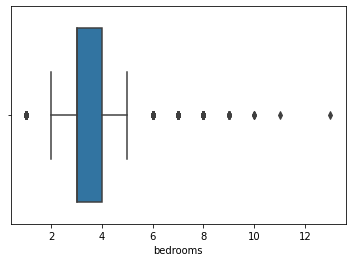

In [14]:
sns.boxplot(x = housing_data['bedrooms'])

**Rationale:** Records listing properties that have no bedroom **and** no bathroom indicate that at time of listing, the property had no bed/bathroom. Because the number of properties that have neither bed/bathroom are small (25 in total), we have decided to drop them.

## Waterfront Properties
- Waterfront properties are highly sought after for their location and view and be a considered a "luxury" listing. 

In [15]:
housing_data['waterfront'].value_counts()

NO     29592
YES      513
Name: waterfront, dtype: int64

In [16]:
# evaluating how many properties have a waterfront view 
print(f" There are {housing_data['waterfront'].value_counts()[0]} that do not have a waterfront view")
print(f" There are {housing_data['waterfront'].value_counts()[1]} that do not have a waterfront view")

 There are 29592 that do not have a waterfront view
 There are 513 that do not have a waterfront view


<AxesSubplot:xlabel='waterfront', ylabel='price'>

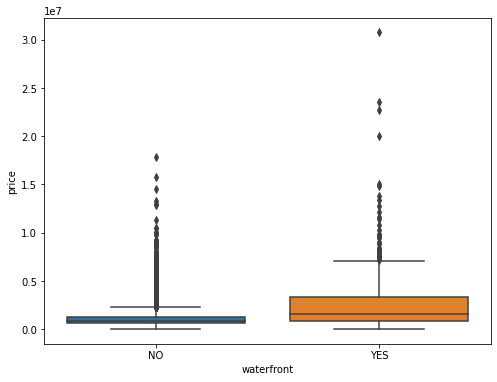

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xlabel("Waterfront Properties")
ax.set_ylabel("Price")
sns.boxplot(x = housing_data['waterfront'], y = 'price', data = housing_data)

## NaN Values 

In [18]:
# viewing nan values
housing_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [19]:
# dropping nan values 
housing_data.dropna(axis = 1, inplace = True)

In [20]:
# checking to see if NaN values were dropped
housing_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

## Duplicate Values

In [21]:
# viewing duplicate records in dataframe
housing_data[housing_data.duplicated()]

len(housing_data[housing_data.duplicated()])

3

There are x completely identical rows

In [22]:
# dropping duplicate rows 
housing_data = housing_data.drop_duplicates()

## Extracting Zipcode From Full Address

In [23]:
import usaddress
def extract_zipcode(address):
    parsed_address = usaddress.parse(address)
    for component in parsed_address:
        if component[1] == 'ZipCode':
            return component[0]
    return None
# applying function to the 'address' column to extract the zip code
housing_data['zipcode'] = housing_data['address'].apply(extract_zipcode)

In [24]:
# cleaning zip code column
housing_data['zipcode'] = housing_data['zipcode'].str.replace(',','')

In [25]:
# converting zip codes to strings
zip_codes['zipcode'] = zip_codes['zipcode'].astype(str)

In [26]:
# checking how many records match with correct zip codes in King County
housing_data['zipcode'].isin(zip_codes['zipcode']).sum()

29162

## Calculating Year & Month Sold 

In [27]:
# calculating month and year sold from date column
housing_data['sold_year'] = pd.to_datetime(housing_data['date']).dt.year
housing_data['sold_month'] = pd.to_datetime(housing_data['date']).dt.month

# dropping date column since no longer needed
housing_data.drop(columns = 'date', inplace = True)

## Calculating Property Age When Sold

In [28]:
# to calculate property age when sold, need to know when property was built and sold
housing_data[['sold_year', 'yr_built']]

,sold_year,yr_built
0,2022,1969
1,2021,1950
2,2021,1956
3,2021,2010
4,2021,2012
...,...,...
30150,2021,1921
30151,2021,2011
30152,2022,1995
30153,2022,2006


In [29]:
housing_data['age_sold'] = housing_data['sold_year'] - housing_data['yr_built']

## Houses That Have Been Renovated

In [30]:
# calculating how many properties were renovated 
print(f" There are {len(housing_data[housing_data['yr_renovated'] != 0])} houses that have been renovated")

 There are 1369 houses that have been renovated


In [31]:
# creating a new column based on whether properties were renovated when sold 
housing_data['renovated'] =  housing_data['yr_renovated'] != 0
housing_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,sold_year,sold_month,age_sold,renovated
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,2022,5,53,False
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2021,12,71,False
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2021,9,65,False
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2021,12,11,False
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2021,8,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,Good,8 Good,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,2021,11,100,False
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,Average,7 Average,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2021,6,10,False
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,Average,7 Average,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2022,5,27,False
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,Average,8 Good,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2022,2,16,False


## Building Grade

In [ ]:
# Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:
'''
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.
'''

In [32]:
# extracting only the integer value from the grade column
housing_data['grade'] = housing_data['grade'].str.extract('(\d+)').astype(int)

In [33]:
# sorting values by grade category
housing_data['grade'].value_counts().sort_index(ascending = True)

1         1
2         1
3         8
4        49
5       388
6      2850
7     11678
8      9401
9      3804
10     1370
11      406
12      122
13       24
Name: grade, dtype: int64

## Creating a New Dataframe

In [35]:
housing_data = pd.merge(housing_data, zip_codes, on = 'zipcode')

In [36]:
# further cleaning data by dropping unnecessary columns
housing_data.drop(columns = ['address','lat', 'long'], inplace = True)

In [37]:
# checking to see if merge produced nan values
housing_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
zipcode          0
sold_year        0
sold_month       0
age_sold         0
renovated        0
city             0
dtype: int64

In [38]:
housing_data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,sold_year,sold_month,age_sold,renovated,city
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7,1180,0,0,40,1969,0,98055,2022,5,53,False,Renton
1,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,Average,7,930,930,240,90,1950,2008,98055,2022,3,72,True,Renton
2,728000.0,4,2.0,2170,7520,1.0,NO,NO,NO,Average,7,1240,1240,490,60,1973,0,98055,2022,3,49,False,Renton


## Cleaned Dataframe

In [40]:
housing_data.to_csv('KC_Data/cleaned_housing_data')

In [43]:
pd.read_csv('KC_Data/cleaned_housing_data', index_col = 0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,sold_year,sold_month,age_sold,renovated,city
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7,1180,0,0,40,1969,0,98055,2022,5,53,False,Renton
1,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,Average,7,930,930,240,90,1950,2008,98055,2022,3,72,True,Renton
2,728000.0,4,2.0,2170,7520,1.0,NO,NO,NO,Average,7,1240,1240,490,60,1973,0,98055,2022,3,49,False,Renton
3,565000.0,4,2.0,1400,10364,1.5,NO,NO,NO,Good,6,1400,0,330,330,1971,0,98055,2022,3,51,False,Renton
4,645000.0,3,2.0,1520,8250,1.0,NO,NO,NO,Average,8,1190,590,420,200,1981,0,98055,2021,12,40,False,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29157,750000.0,3,1.0,1530,33250,1.5,NO,NO,NO,Very Good,6,1530,110,0,360,1904,0,98050,2021,9,117,False,Preston
29158,315000.0,1,1.0,480,7475,1.0,NO,NO,YES,Average,6,480,0,0,0,1908,1970,98224,2021,7,113,True,Baring
29159,250000.0,2,1.0,1040,114998,1.0,NO,NO,YES,Fair,6,1040,0,0,0,1928,0,98224,2021,11,93,False,Baring
29160,202000.0,2,1.0,1260,11160,1.5,NO,NO,YES,Average,5,1260,0,0,110,1918,0,98224,2021,10,103,False,Baring


### Rationale: 
- The majority of properties in the dataset are between building grade codes 6 & 9. Additionally, for the purposes of our analysis, a building grade 6 is the lowest code that meets building code and 9 being the upper threshold have better architectural design without additional customization. 

In [ ]:
# notes 
# grade column 
# predictor(y) : price 
# features : neighborhood 
# more than 30k houses 
# 773 houses are by a greenbelt 
# avg price for a house in greenbelt is 1.5
# not many houses were renovated before being sold 
# majority of the houses were sold only in two years 2021, 2022
# majority of houses have grade between 6 and 9 
# houses were sold between June '21' and June '22'

# inflation
# we are assuming that inflation is not a serious variable in building the model 
# use inflation rate 
# interest rate formula 
# post-model prediction: adjust for inflation 

# outliers in terms of price
# don't necessarily remove the data as it will affect the accuracy of the overall model 
# for example, we can say that the model might be better at predicting sale price for a given subset price
# scatterplot of prediction (x) and actual price (y) 